# 02_Beginning of Deeplearning - Blood Fat

In [1]:
import numpy as np

url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/x09.txt'
raw_data = np.genfromtxt(url, skip_header=36)
raw_data

## index 안내
# 0 : index_num
# 1 : 구분선
# 2~4 : data

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.],
       [ 11.,   1.,  27.,  24., 209.],
       [ 12.,   1.,  89.,  31., 290.],
       [ 13.,   1.,  65.,  52., 346.],
       [ 14.,   1.,  57.,  23., 254.],
       [ 15.,   1.,  59.,  60., 395.],
       [ 16.,   1.,  69.,  48., 434.],
       [ 17.,   1.,  60.,  34., 220.],
       [ 18.,   1.,  79.,  51., 374.],
       [ 19.,   1.,  75.,  50., 308.],
       [ 20.,   1.,  82.,  34., 220.],
       [ 21.,   1.,  59.,  46., 311.],
       [ 22.,   1.,  67.,  23., 181.],
       [ 23.,   1.,  85.,  37., 274.],
       [ 24.,   1.,  55.,  40., 303.],
       [ 25.,   1.,  63.,  30., 244.]])

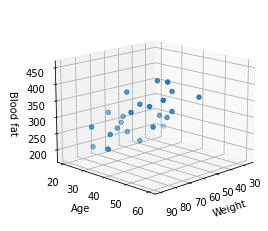

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

xs = np.array(raw_data[:,2], dtype=np.float32)
ys = np.array(raw_data[:,3], dtype=np.float32)
zs = np.array(raw_data[:,4], dtype=np.float32)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15, 45)
            # 위아래 각도
                # 좌우 각도
plt.show()

> ### - 이 예제의 목적은 입력인 `나이`와 `몸무게`를 알려주면, 주어진 데이터 기준의 `blood fat`을 얻는 것이다.
> ### - 즉, 40살, 100키로인 사람의 데이터 기준 blood fat은 ? 하고 물으면, 얼마입니다. 하고 답이 나와야 하는 것이다.
> ### - `Linear Regression`

![](./lecture_image/02-01.png)

![](./lecture_image/02-02.png)
> #### - `X.shape` : (25 * 2)
> #### - `W.shape` : (2 * 1)
> #### - `b.shape` : (25 * 1)

>> - `y의 shape이 위의 계산 shape과 같아야 한다.`

---------------

In [3]:
# 학습 대상 데이터 추리기
x_data = np.array(raw_data[:,2:4], dtype=np.float32)        # (25,2) shape      // feature data
y_data = np.array(raw_data[:,4], dtype=np.float32)          # (25,) shape

y_data = y_data.reshape((25,1))     # (25,1) shape 으로 변환해야 한다.

In [4]:
# 모델 만들기
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(2,))
])

Metal device set to: Apple M1


2022-05-31 00:36:25.073623: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-31 00:36:25.073837: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## **loss 란**
- 학습을 위해서는 `loss(cost) 함수`를 정해주어야 한다.
- loss 함수는 간략히 말해서, `정답까지 얼마나 멀리 있는지를 측정`하는 함수이다.
- 이번에는 `mse:Mean Squared Error (오차 제곱의 평균)`을 사용
- 그리고, `옵티마이저를 선정`한다.
- 옵티마이저는 `loss를 어떻게 줄일것인지를 결정하는 방법`을 선택하는 것이다.

In [5]:
model.compile(optimizer='rmsprop', loss='mse')

## **optimazer**
- optimizer는 `loss 함수를 최소화하는 가중치를 찾아가는 과정`에 대한 알고리즘이다.
- 여기서는 `rmsprop`를 사용

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


# `fit`

In [7]:
hist = model.fit(x_data, y_data, epochs=5000)
                # feature
                        # label
                                # epochs
                                # epochs 5000 을 설정하니 VSCode에서 오류발생하여 jupyter로 이동

2022-05-31 00:36:25.187651: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/5000
1/1 [==============================] - 0s 171ms/step - loss: 137152.0156
Epoch 2/5000
1/1 [==============================] - 0s 5ms/step - loss: 136896.7812


2022-05-31 00:36:25.291095: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 3/5000
1/1 [==============================] - 0s 5ms/step - loss: 136711.8281
Epoch 4/5000
1/1 [==============================] - 0s 5ms/step - loss: 136557.1094
Epoch 5/5000
1/1 [==============================] - 0s 5ms/step - loss: 136419.8750
Epoch 6/5000
1/1 [==============================] - 0s 5ms/step - loss: 136294.1875
Epoch 7/5000
1/1 [==============================] - 0s 4ms/step - loss: 136176.7500
Epoch 8/5000
1/1 [==============================] - 0s 4ms/step - loss: 136065.5312
Epoch 9/5000
1/1 [==============================] - 0s 6ms/step - loss: 135959.1406
Epoch 10/5000
1/1 [==============================] - 0s 5ms/step - loss: 135856.5938
Epoch 11/5000
1/1 [==============================] - 0s 5ms/step - loss: 135757.2031
Epoch 12/5000
1/1 [==============================] - 0s 8ms/step - loss: 135660.4062
Epoch 13/5000
1/1 [==============================] - 0s 5ms/step - loss: 135565.7969
Epoch 14/5000
1/1 [==============================] - 0s 6ms/step - loss:

1/1 [==============================] - 0s 5ms/step - loss: 121365.8672
Epoch 195/5000
1/1 [==============================] - 0s 4ms/step - loss: 121290.2656
Epoch 196/5000
1/1 [==============================] - 0s 5ms/step - loss: 121214.6875
Epoch 197/5000
1/1 [==============================] - 0s 6ms/step - loss: 121139.1406
Epoch 198/5000
1/1 [==============================] - 0s 4ms/step - loss: 121063.6094
Epoch 199/5000
1/1 [==============================] - 0s 4ms/step - loss: 120988.1094
Epoch 200/5000
1/1 [==============================] - 0s 4ms/step - loss: 120912.6172
Epoch 201/5000
1/1 [==============================] - 0s 7ms/step - loss: 120837.1562
Epoch 202/5000
1/1 [==============================] - 0s 5ms/step - loss: 120761.7266
Epoch 203/5000
1/1 [==============================] - 0s 4ms/step - loss: 120686.3203
Epoch 204/5000
1/1 [==============================] - 0s 5ms/step - loss: 120610.9375
Epoch 205/5000
1/1 [==============================] - 0s 5ms/step - l

1/1 [==============================] - 0s 4ms/step - loss: 107438.3984
Epoch 385/5000
1/1 [==============================] - 0s 5ms/step - loss: 107367.4297
Epoch 386/5000
1/1 [==============================] - 0s 5ms/step - loss: 107296.4766
Epoch 387/5000
1/1 [==============================] - 0s 4ms/step - loss: 107225.5391
Epoch 388/5000
1/1 [==============================] - 0s 4ms/step - loss: 107154.6406
Epoch 389/5000
1/1 [==============================] - 0s 4ms/step - loss: 107083.7578
Epoch 390/5000
1/1 [==============================] - 0s 4ms/step - loss: 107012.8984
Epoch 391/5000
1/1 [==============================] - 0s 4ms/step - loss: 106942.0781
Epoch 392/5000
1/1 [==============================] - 0s 5ms/step - loss: 106871.2578
Epoch 393/5000
1/1 [==============================] - 0s 4ms/step - loss: 106800.4766
Epoch 394/5000
1/1 [==============================] - 0s 4ms/step - loss: 106729.7188
Epoch 395/5000
1/1 [==============================] - 0s 5ms/step - l

1/1 [==============================] - 0s 4ms/step - loss: 94323.3359
Epoch 576/5000
1/1 [==============================] - 0s 4ms/step - loss: 94257.0000
Epoch 577/5000
1/1 [==============================] - 0s 5ms/step - loss: 94190.6953
Epoch 578/5000
1/1 [==============================] - 0s 5ms/step - loss: 94124.4062
Epoch 579/5000
1/1 [==============================] - 0s 4ms/step - loss: 94058.1562
Epoch 580/5000
1/1 [==============================] - 0s 5ms/step - loss: 93991.9375
Epoch 581/5000
1/1 [==============================] - 0s 4ms/step - loss: 93925.7266
Epoch 582/5000
1/1 [==============================] - 0s 4ms/step - loss: 93859.5469
Epoch 583/5000
1/1 [==============================] - 0s 5ms/step - loss: 93793.3984
Epoch 584/5000
1/1 [==============================] - 0s 4ms/step - loss: 93727.2500
Epoch 585/5000
1/1 [==============================] - 0s 4ms/step - loss: 93661.1484
Epoch 586/5000
1/1 [==============================] - 0s 6ms/step - loss: 93595.

1/1 [==============================] - 0s 4ms/step - loss: 82034.4297
Epoch 768/5000
1/1 [==============================] - 0s 6ms/step - loss: 81972.7734
Epoch 769/5000
1/1 [==============================] - 0s 4ms/step - loss: 81911.1328
Epoch 770/5000
1/1 [==============================] - 0s 4ms/step - loss: 81849.5312
Epoch 771/5000
1/1 [==============================] - 0s 4ms/step - loss: 81787.9453
Epoch 772/5000
1/1 [==============================] - 0s 5ms/step - loss: 81726.3828
Epoch 773/5000
1/1 [==============================] - 0s 4ms/step - loss: 81664.8516
Epoch 774/5000
1/1 [==============================] - 0s 7ms/step - loss: 81603.3438
Epoch 775/5000
1/1 [==============================] - 0s 4ms/step - loss: 81541.8516
Epoch 776/5000
1/1 [==============================] - 0s 5ms/step - loss: 81480.3906
Epoch 777/5000
1/1 [==============================] - 0s 5ms/step - loss: 81418.9531
Epoch 778/5000
1/1 [==============================] - 0s 4ms/step - loss: 81357.

1/1 [==============================] - 0s 6ms/step - loss: 70642.4453
Epoch 960/5000
1/1 [==============================] - 0s 5ms/step - loss: 70585.4531
Epoch 961/5000
1/1 [==============================] - 0s 5ms/step - loss: 70528.4922
Epoch 962/5000
1/1 [==============================] - 0s 4ms/step - loss: 70471.5547
Epoch 963/5000
1/1 [==============================] - 0s 5ms/step - loss: 70414.6406
Epoch 964/5000
1/1 [==============================] - 0s 5ms/step - loss: 70357.7500
Epoch 965/5000
1/1 [==============================] - 0s 4ms/step - loss: 70300.8906
Epoch 966/5000
1/1 [==============================] - 0s 7ms/step - loss: 70244.0547
Epoch 967/5000
1/1 [==============================] - 0s 4ms/step - loss: 70187.2422
Epoch 968/5000
1/1 [==============================] - 0s 5ms/step - loss: 70130.4375
Epoch 969/5000
1/1 [==============================] - 0s 6ms/step - loss: 70073.6797
Epoch 970/5000
1/1 [==============================] - 0s 4ms/step - loss: 70016.

1/1 [==============================] - 0s 6ms/step - loss: 60251.8281
Epoch 1150/5000
1/1 [==============================] - 0s 5ms/step - loss: 60199.4688
Epoch 1151/5000
1/1 [==============================] - 0s 5ms/step - loss: 60147.1289
Epoch 1152/5000
1/1 [==============================] - 0s 4ms/step - loss: 60094.8086
Epoch 1153/5000
1/1 [==============================] - 0s 6ms/step - loss: 60042.5195
Epoch 1154/5000
1/1 [==============================] - 0s 6ms/step - loss: 59990.2500
Epoch 1155/5000
1/1 [==============================] - 0s 5ms/step - loss: 59938.0078
Epoch 1156/5000
1/1 [==============================] - 0s 5ms/step - loss: 59885.7891
Epoch 1157/5000
1/1 [==============================] - 0s 5ms/step - loss: 59833.5938
Epoch 1158/5000
1/1 [==============================] - 0s 6ms/step - loss: 59781.4180
Epoch 1159/5000
1/1 [==============================] - 0s 6ms/step - loss: 59729.2734
Epoch 1160/5000
1/1 [==============================] - 0s 7ms/step - l

1/1 [==============================] - 0s 5ms/step - loss: 50738.9883
Epoch 1340/5000
1/1 [==============================] - 0s 5ms/step - loss: 50691.2383
Epoch 1341/5000
1/1 [==============================] - 0s 4ms/step - loss: 50643.5195
Epoch 1342/5000
1/1 [==============================] - 0s 6ms/step - loss: 50595.8203
Epoch 1343/5000
1/1 [==============================] - 0s 5ms/step - loss: 50548.1484
Epoch 1344/5000
1/1 [==============================] - 0s 6ms/step - loss: 50500.5000
Epoch 1345/5000
1/1 [==============================] - 0s 4ms/step - loss: 50452.8789
Epoch 1346/5000
1/1 [==============================] - 0s 5ms/step - loss: 50405.2734
Epoch 1347/5000
1/1 [==============================] - 0s 6ms/step - loss: 50357.6992
Epoch 1348/5000
1/1 [==============================] - 0s 5ms/step - loss: 50310.1484
Epoch 1349/5000
1/1 [==============================] - 0s 5ms/step - loss: 50262.6289
Epoch 1350/5000
1/1 [==============================] - 0s 4ms/step - l

1/1 [==============================] - 0s 6ms/step - loss: 42103.5977
Epoch 1530/5000
1/1 [==============================] - 0s 5ms/step - loss: 42060.4805
Epoch 1531/5000
1/1 [==============================] - 0s 4ms/step - loss: 42017.3750
Epoch 1532/5000
1/1 [==============================] - 0s 5ms/step - loss: 41974.2891
Epoch 1533/5000
1/1 [==============================] - 0s 5ms/step - loss: 41931.2344
Epoch 1534/5000
1/1 [==============================] - 0s 6ms/step - loss: 41888.2031
Epoch 1535/5000
1/1 [==============================] - 0s 4ms/step - loss: 41845.1953
Epoch 1536/5000
1/1 [==============================] - 0s 5ms/step - loss: 41802.2188
Epoch 1537/5000
1/1 [==============================] - 0s 5ms/step - loss: 41759.2578
Epoch 1538/5000
1/1 [==============================] - 0s 5ms/step - loss: 41716.3203
Epoch 1539/5000
1/1 [==============================] - 0s 4ms/step - loss: 41673.4102
Epoch 1540/5000
1/1 [==============================] - 0s 5ms/step - l

1/1 [==============================] - 0s 6ms/step - loss: 34345.2070
Epoch 1720/5000
1/1 [==============================] - 0s 4ms/step - loss: 34306.6914
Epoch 1721/5000
1/1 [==============================] - 0s 6ms/step - loss: 34268.2031
Epoch 1722/5000
1/1 [==============================] - 0s 5ms/step - loss: 34229.7383
Epoch 1723/5000
1/1 [==============================] - 0s 4ms/step - loss: 34191.2969
Epoch 1724/5000
1/1 [==============================] - 0s 6ms/step - loss: 34152.8789
Epoch 1725/5000
1/1 [==============================] - 0s 4ms/step - loss: 34114.4805
Epoch 1726/5000
1/1 [==============================] - 0s 5ms/step - loss: 34076.1133
Epoch 1727/5000
1/1 [==============================] - 0s 5ms/step - loss: 34037.7695
Epoch 1728/5000
1/1 [==============================] - 0s 4ms/step - loss: 33999.4492
Epoch 1729/5000
1/1 [==============================] - 0s 6ms/step - loss: 33961.1523
Epoch 1730/5000
1/1 [==============================] - 0s 6ms/step - l

1/1 [==============================] - 0s 5ms/step - loss: 27463.2598
Epoch 1910/5000
1/1 [==============================] - 0s 6ms/step - loss: 27429.3594
Epoch 1911/5000
1/1 [==============================] - 0s 4ms/step - loss: 27395.4766
Epoch 1912/5000
1/1 [==============================] - 0s 4ms/step - loss: 27361.6250
Epoch 1913/5000
1/1 [==============================] - 0s 7ms/step - loss: 27327.7988
Epoch 1914/5000
1/1 [==============================] - 0s 4ms/step - loss: 27293.9902
Epoch 1915/5000
1/1 [==============================] - 0s 6ms/step - loss: 27260.2090
Epoch 1916/5000
1/1 [==============================] - 0s 5ms/step - loss: 27226.4492
Epoch 1917/5000
1/1 [==============================] - 0s 4ms/step - loss: 27192.7188
Epoch 1918/5000
1/1 [==============================] - 0s 5ms/step - loss: 27159.0117
Epoch 1919/5000
1/1 [==============================] - 0s 5ms/step - loss: 27125.3242
Epoch 1920/5000
1/1 [==============================] - 0s 4ms/step - l

1/1 [==============================] - 0s 6ms/step - loss: 21457.0938
Epoch 2100/5000
1/1 [==============================] - 0s 4ms/step - loss: 21427.7988
Epoch 2101/5000
1/1 [==============================] - 0s 4ms/step - loss: 21398.5273
Epoch 2102/5000
1/1 [==============================] - 0s 7ms/step - loss: 21369.2793
Epoch 2103/5000
1/1 [==============================] - 0s 4ms/step - loss: 21340.0566
Epoch 2104/5000
1/1 [==============================] - 0s 4ms/step - loss: 21310.8594
Epoch 2105/5000
1/1 [==============================] - 0s 7ms/step - loss: 21281.6816
Epoch 2106/5000
1/1 [==============================] - 0s 4ms/step - loss: 21252.5371
Epoch 2107/5000
1/1 [==============================] - 0s 4ms/step - loss: 21223.4102
Epoch 2108/5000
1/1 [==============================] - 0s 6ms/step - loss: 21194.3066
Epoch 2109/5000
1/1 [==============================] - 0s 4ms/step - loss: 21165.2324
Epoch 2110/5000
1/1 [==============================] - 0s 4ms/step - l

1/1 [==============================] - 0s 4ms/step - loss: 16325.8047
Epoch 2290/5000
1/1 [==============================] - 0s 6ms/step - loss: 16301.1094
Epoch 2291/5000
1/1 [==============================] - 0s 4ms/step - loss: 16276.4395
Epoch 2292/5000
1/1 [==============================] - 0s 5ms/step - loss: 16251.7969
Epoch 2293/5000
1/1 [==============================] - 0s 7ms/step - loss: 16227.1758
Epoch 2294/5000
1/1 [==============================] - 0s 4ms/step - loss: 16202.5771
Epoch 2295/5000
1/1 [==============================] - 0s 6ms/step - loss: 16178.0049
Epoch 2296/5000
1/1 [==============================] - 0s 4ms/step - loss: 16153.4551
Epoch 2297/5000
1/1 [==============================] - 0s 4ms/step - loss: 16128.9297
Epoch 2298/5000
1/1 [==============================] - 0s 6ms/step - loss: 16104.4326
Epoch 2299/5000
1/1 [==============================] - 0s 4ms/step - loss: 16079.9551
Epoch 2300/5000
1/1 [==============================] - 0s 4ms/step - l

1/1 [==============================] - 0s 4ms/step - loss: 14087.8721
Epoch 2385/5000
1/1 [==============================] - 0s 6ms/step - loss: 14065.4746
Epoch 2386/5000
1/1 [==============================] - 0s 5ms/step - loss: 14043.1045
Epoch 2387/5000
1/1 [==============================] - 0s 4ms/step - loss: 14020.7559
Epoch 2388/5000
1/1 [==============================] - 0s 6ms/step - loss: 13998.4346
Epoch 2389/5000
1/1 [==============================] - 0s 4ms/step - loss: 13976.1357
Epoch 2390/5000
1/1 [==============================] - 0s 4ms/step - loss: 13953.8594
Epoch 2391/5000
1/1 [==============================] - 0s 7ms/step - loss: 13931.6074
Epoch 2392/5000
1/1 [==============================] - 0s 4ms/step - loss: 13909.3799
Epoch 2393/5000
1/1 [==============================] - 0s 4ms/step - loss: 13887.1758
Epoch 2394/5000
1/1 [==============================] - 0s 6ms/step - loss: 13864.9961
Epoch 2395/5000
1/1 [==============================] - 0s 4ms/step - l

1/1 [==============================] - 0s 4ms/step - loss: 10266.4111
Epoch 2575/5000
1/1 [==============================] - 0s 6ms/step - loss: 10248.6035
Epoch 2576/5000
1/1 [==============================] - 0s 5ms/step - loss: 10230.8213
Epoch 2577/5000
1/1 [==============================] - 0s 4ms/step - loss: 10213.0605
Epoch 2578/5000
1/1 [==============================] - 0s 7ms/step - loss: 10195.3232
Epoch 2579/5000
1/1 [==============================] - 0s 4ms/step - loss: 10177.6133
Epoch 2580/5000
1/1 [==============================] - 0s 5ms/step - loss: 10159.9248
Epoch 2581/5000
1/1 [==============================] - 0s 5ms/step - loss: 10142.2607
Epoch 2582/5000
1/1 [==============================] - 0s 4ms/step - loss: 10124.6230
Epoch 2583/5000
1/1 [==============================] - 0s 6ms/step - loss: 10107.0107
Epoch 2584/5000
1/1 [==============================] - 0s 4ms/step - loss: 10089.4219
Epoch 2585/5000
1/1 [==============================] - 0s 4ms/step - l

1/1 [==============================] - 0s 4ms/step - loss: 7289.0645
Epoch 2767/5000
1/1 [==============================] - 0s 4ms/step - loss: 7275.8779
Epoch 2768/5000
1/1 [==============================] - 0s 5ms/step - loss: 7262.7173
Epoch 2769/5000
1/1 [==============================] - 0s 5ms/step - loss: 7249.5781
Epoch 2770/5000
1/1 [==============================] - 0s 4ms/step - loss: 7236.4648
Epoch 2771/5000
1/1 [==============================] - 0s 6ms/step - loss: 7223.3760
Epoch 2772/5000
1/1 [==============================] - 0s 4ms/step - loss: 7210.3105
Epoch 2773/5000
1/1 [==============================] - 0s 4ms/step - loss: 7197.2681
Epoch 2774/5000
1/1 [==============================] - 0s 6ms/step - loss: 7184.2485
Epoch 2775/5000
1/1 [==============================] - 0s 4ms/step - loss: 7171.2573
Epoch 2776/5000
1/1 [==============================] - 0s 5ms/step - loss: 7158.2866
Epoch 2777/5000
1/1 [==============================] - 0s 5ms/step - loss: 7145.3

1/1 [==============================] - 0s 5ms/step - loss: 5196.6460
Epoch 2959/5000
1/1 [==============================] - 0s 6ms/step - loss: 5188.0527
Epoch 2960/5000
1/1 [==============================] - 0s 4ms/step - loss: 5179.4834
Epoch 2961/5000
1/1 [==============================] - 0s 4ms/step - loss: 5170.9375
Epoch 2962/5000
1/1 [==============================] - 0s 4ms/step - loss: 5162.4165
Epoch 2963/5000
1/1 [==============================] - 0s 4ms/step - loss: 5153.9180
Epoch 2964/5000
1/1 [==============================] - 0s 6ms/step - loss: 5145.4438
Epoch 2965/5000
1/1 [==============================] - ETA: 0s - loss: 5136.99 - 0s 4ms/step - loss: 5136.9937
Epoch 2966/5000
1/1 [==============================] - 0s 5ms/step - loss: 5128.5659
Epoch 2967/5000
1/1 [==============================] - 0s 5ms/step - loss: 5120.1641
Epoch 2968/5000
1/1 [==============================] - 0s 4ms/step - loss: 5111.7847
Epoch 2969/5000
1/1 [==============================] - 

Epoch 3150/5000
1/1 [==============================] - 0s 6ms/step - loss: 3980.1902
Epoch 3151/5000
1/1 [==============================] - 0s 4ms/step - loss: 3976.1128
Epoch 3152/5000
1/1 [==============================] - 0s 5ms/step - loss: 3972.0586
Epoch 3153/5000
1/1 [==============================] - 0s 5ms/step - loss: 3968.0283
Epoch 3154/5000
1/1 [==============================] - 0s 5ms/step - loss: 3964.0205
Epoch 3155/5000
1/1 [==============================] - 0s 6ms/step - loss: 3960.0356
Epoch 3156/5000
1/1 [==============================] - 0s 4ms/step - loss: 3956.0747
Epoch 3157/5000
1/1 [==============================] - 0s 5ms/step - loss: 3952.1343
Epoch 3158/5000
1/1 [==============================] - 0s 4ms/step - loss: 3948.2192
Epoch 3159/5000
1/1 [==============================] - 0s 4ms/step - loss: 3944.3259
Epoch 3160/5000
1/1 [==============================] - 0s 5ms/step - loss: 3940.4568
Epoch 3161/5000
1/1 [==============================] - 0s 4ms/ste

1/1 [==============================] - 0s 5ms/step - loss: 3572.1294
Epoch 3343/5000
1/1 [==============================] - 0s 5ms/step - loss: 3571.0994
Epoch 3344/5000
1/1 [==============================] - 0s 5ms/step - loss: 3570.0686
Epoch 3345/5000
1/1 [==============================] - 0s 5ms/step - loss: 3569.0393
Epoch 3346/5000
1/1 [==============================] - 0s 4ms/step - loss: 3568.0100
Epoch 3347/5000
1/1 [==============================] - 0s 6ms/step - loss: 3566.9810
Epoch 3348/5000
1/1 [==============================] - 0s 5ms/step - loss: 3565.9524
Epoch 3349/5000
1/1 [==============================] - 0s 4ms/step - loss: 3564.9233
Epoch 3350/5000
1/1 [==============================] - 0s 5ms/step - loss: 3563.8955
Epoch 3351/5000
1/1 [==============================] - 0s 5ms/step - loss: 3562.8682
Epoch 3352/5000
1/1 [==============================] - 0s 5ms/step - loss: 3561.8408
Epoch 3353/5000
1/1 [==============================] - 0s 4ms/step - loss: 3560.8

1/1 [==============================] - 0s 5ms/step - loss: 3380.5068
Epoch 3535/5000
1/1 [==============================] - 0s 4ms/step - loss: 3379.5396
Epoch 3536/5000
1/1 [==============================] - 0s 5ms/step - loss: 3378.5725
Epoch 3537/5000
1/1 [==============================] - 0s 6ms/step - loss: 3377.6055
Epoch 3538/5000
1/1 [==============================] - 0s 4ms/step - loss: 3376.6394
Epoch 3539/5000
1/1 [==============================] - 0s 6ms/step - loss: 3375.6729
Epoch 3540/5000
1/1 [==============================] - 0s 4ms/step - loss: 3374.7065
Epoch 3541/5000
1/1 [==============================] - 0s 4ms/step - loss: 3373.7410
Epoch 3542/5000
1/1 [==============================] - 0s 7ms/step - loss: 3372.7749
Epoch 3543/5000
1/1 [==============================] - 0s 4ms/step - loss: 3371.8105
Epoch 3544/5000
1/1 [==============================] - 0s 5ms/step - loss: 3370.8452
Epoch 3545/5000
1/1 [==============================] - 0s 4ms/step - loss: 3369.8

1/1 [==============================] - 0s 4ms/step - loss: 3200.3784
Epoch 3727/5000
1/1 [==============================] - 0s 4ms/step - loss: 3199.4702
Epoch 3728/5000
1/1 [==============================] - 0s 6ms/step - loss: 3198.5618
Epoch 3729/5000
1/1 [==============================] - 0s 5ms/step - loss: 3197.6543
Epoch 3730/5000
1/1 [==============================] - 0s 5ms/step - loss: 3196.7461
Epoch 3731/5000
1/1 [==============================] - 0s 4ms/step - loss: 3195.8394
Epoch 3732/5000
1/1 [==============================] - 0s 5ms/step - loss: 3194.9324
Epoch 3733/5000
1/1 [==============================] - 0s 6ms/step - loss: 3194.0256
Epoch 3734/5000
1/1 [==============================] - 0s 4ms/step - loss: 3193.1194
Epoch 3735/5000
1/1 [==============================] - 0s 5ms/step - loss: 3192.2136
Epoch 3736/5000
1/1 [==============================] - 0s 5ms/step - loss: 3191.3074
Epoch 3737/5000
1/1 [==============================] - 0s 5ms/step - loss: 3190.4

1/1 [==============================] - 0s 4ms/step - loss: 3031.5999
Epoch 3919/5000
1/1 [==============================] - 0s 5ms/step - loss: 3030.7502
Epoch 3920/5000
1/1 [==============================] - 0s 6ms/step - loss: 3029.9011
Epoch 3921/5000
1/1 [==============================] - 0s 5ms/step - loss: 3029.0530
Epoch 3922/5000
1/1 [==============================] - 0s 5ms/step - loss: 3028.2043
Epoch 3923/5000
1/1 [==============================] - 0s 4ms/step - loss: 3027.3560
Epoch 3924/5000
1/1 [==============================] - 0s 5ms/step - loss: 3026.5088
Epoch 3925/5000
1/1 [==============================] - 0s 6ms/step - loss: 3025.6611
Epoch 3926/5000
1/1 [==============================] - 0s 4ms/step - loss: 3024.8140
Epoch 3927/5000
1/1 [==============================] - 0s 4ms/step - loss: 3023.9670
Epoch 3928/5000
1/1 [==============================] - 0s 5ms/step - loss: 3023.1206
Epoch 3929/5000
1/1 [==============================] - 0s 5ms/step - loss: 3022.2

1/1 [==============================] - 0s 5ms/step - loss: 2874.1731
Epoch 4111/5000
1/1 [==============================] - 0s 4ms/step - loss: 2873.3838
Epoch 4112/5000
1/1 [==============================] - 0s 5ms/step - loss: 2872.5928
Epoch 4113/5000
1/1 [==============================] - 0s 4ms/step - loss: 2871.8037
Epoch 4114/5000
1/1 [==============================] - 0s 4ms/step - loss: 2871.0139
Epoch 4115/5000
1/1 [==============================] - 0s 5ms/step - loss: 2870.2256
Epoch 4116/5000
1/1 [==============================] - 0s 5ms/step - loss: 2869.4368
Epoch 4117/5000
1/1 [==============================] - 0s 4ms/step - loss: 2868.6487
Epoch 4118/5000
1/1 [==============================] - 0s 4ms/step - loss: 2867.8599
Epoch 4119/5000
1/1 [==============================] - 0s 5ms/step - loss: 2867.0730
Epoch 4120/5000
1/1 [==============================] - 0s 4ms/step - loss: 2866.2849
Epoch 4121/5000
1/1 [==============================] - 0s 5ms/step - loss: 2865.4

1/1 [==============================] - 0s 5ms/step - loss: 2728.1099
Epoch 4303/5000
1/1 [==============================] - 0s 5ms/step - loss: 2727.3794
Epoch 4304/5000
1/1 [==============================] - 0s 5ms/step - loss: 2726.6477
Epoch 4305/5000
1/1 [==============================] - 0s 5ms/step - loss: 2725.9180
Epoch 4306/5000
1/1 [==============================] - 0s 5ms/step - loss: 2725.1875
Epoch 4307/5000
1/1 [==============================] - 0s 5ms/step - loss: 2724.4580
Epoch 4308/5000
1/1 [==============================] - 0s 4ms/step - loss: 2723.7280
Epoch 4309/5000
1/1 [==============================] - 0s 4ms/step - loss: 2722.9990
Epoch 4310/5000
1/1 [==============================] - 0s 5ms/step - loss: 2722.2693
Epoch 4311/5000
1/1 [==============================] - 0s 4ms/step - loss: 2721.5417
Epoch 4312/5000
1/1 [==============================] - 0s 5ms/step - loss: 2720.8130
Epoch 4313/5000
1/1 [==============================] - 0s 5ms/step - loss: 2720.0

1/1 [==============================] - 0s 4ms/step - loss: 2593.3896
Epoch 4495/5000
1/1 [==============================] - 0s 6ms/step - loss: 2592.7175
Epoch 4496/5000
1/1 [==============================] - 0s 4ms/step - loss: 2592.0464
Epoch 4497/5000
1/1 [==============================] - 0s 4ms/step - loss: 2591.3745
Epoch 4498/5000
1/1 [==============================] - 0s 7ms/step - loss: 2590.7034
Epoch 4499/5000
1/1 [==============================] - 0s 4ms/step - loss: 2590.0327
Epoch 4500/5000
1/1 [==============================] - 0s 7ms/step - loss: 2589.3621
Epoch 4501/5000
1/1 [==============================] - 0s 5ms/step - loss: 2588.6924
Epoch 4502/5000
1/1 [==============================] - 0s 4ms/step - loss: 2588.0217
Epoch 4503/5000
1/1 [==============================] - 0s 6ms/step - loss: 2587.3525
Epoch 4504/5000
1/1 [==============================] - 0s 4ms/step - loss: 2586.6831
Epoch 4505/5000
1/1 [==============================] - 0s 5ms/step - loss: 2586.0

1/1 [==============================] - 0s 5ms/step - loss: 2470.0100
Epoch 4687/5000
1/1 [==============================] - 0s 6ms/step - loss: 2469.3967
Epoch 4688/5000
1/1 [==============================] - 0s 4ms/step - loss: 2468.7844
Epoch 4689/5000
1/1 [==============================] - 0s 6ms/step - loss: 2468.1726
Epoch 4690/5000
1/1 [==============================] - 0s 4ms/step - loss: 2467.5601
Epoch 4691/5000
1/1 [==============================] - 0s 4ms/step - loss: 2466.9487
Epoch 4692/5000
1/1 [==============================] - 0s 5ms/step - loss: 2466.3374
Epoch 4693/5000
1/1 [==============================] - 0s 4ms/step - loss: 2465.7266
Epoch 4694/5000
1/1 [==============================] - 0s 4ms/step - loss: 2465.1155
Epoch 4695/5000
1/1 [==============================] - 0s 6ms/step - loss: 2464.5051
Epoch 4696/5000
1/1 [==============================] - 0s 4ms/step - loss: 2463.8950
Epoch 4697/5000
1/1 [==============================] - 0s 5ms/step - loss: 2463.2

1/1 [==============================] - 0s 7ms/step - loss: 2357.9744
Epoch 4879/5000
1/1 [==============================] - 0s 5ms/step - loss: 2357.4207
Epoch 4880/5000
1/1 [==============================] - 0s 7ms/step - loss: 2356.8669
Epoch 4881/5000
1/1 [==============================] - 0s 4ms/step - loss: 2356.3135
Epoch 4882/5000
1/1 [==============================] - 0s 5ms/step - loss: 2355.7607
Epoch 4883/5000
1/1 [==============================] - 0s 5ms/step - loss: 2355.2080
Epoch 4884/5000
1/1 [==============================] - 0s 4ms/step - loss: 2354.6555
Epoch 4885/5000
1/1 [==============================] - 0s 5ms/step - loss: 2354.1040
Epoch 4886/5000
1/1 [==============================] - 0s 5ms/step - loss: 2353.5522
Epoch 4887/5000
1/1 [==============================] - 0s 4ms/step - loss: 2353.0005
Epoch 4888/5000
1/1 [==============================] - 0s 5ms/step - loss: 2352.4492
Epoch 4889/5000
1/1 [==============================] - 0s 4ms/step - loss: 2351.8

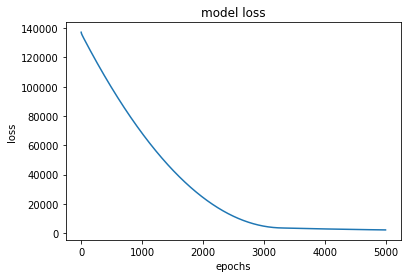

In [9]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

In [10]:
# predict 진행
model.predict(np.array([100,44]).reshape(1,2))
                        # 100 kg
                            # 44 age

2022-05-31 00:42:59.534722: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[394.90573]], dtype=float32)

In [11]:
model.predict(np.array([60, 25]).reshape(1,2))

array([[233.47491]], dtype=float32)

In [12]:
# 가중치와 bias 알기
W_, b_ = model.get_weights()
                # get_weights : Retrieves the weights of the model.
print('Weight is : ', W_)
print('bias is : ', b_)

Weight is :  [[2.1850076]
 [3.896343 ]]
bias is :  [4.965877]


In [13]:
x = np.linspace(20, 100, 50).reshape(50,1)
                # 20kg ~ 100kg 까지 50개의 데이터 제작
y = np.linspace(10, 70, 50).reshape(50,1)
                # 10 ~ 70 age 까지 50개의 데이터 제작
    
X = np.concatenate((x,y),axis=1)
        # concatenate : Join a sequence of arrays along an existing axis.
Z = np.matmul(X, W_) + b_

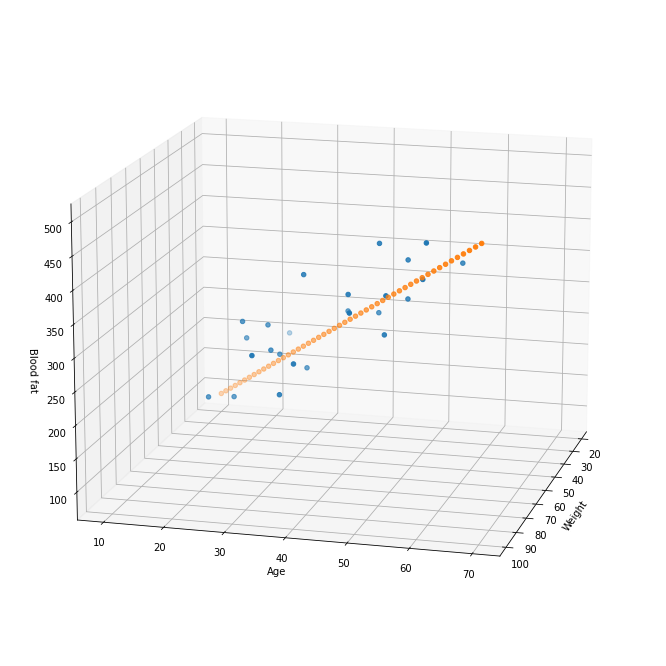

In [24]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.scatter(x, y, Z)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15,15)
plt.show()